In [ ]:
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = False
VERBOSE = False
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

env.reset()
done = False

if VERBOSE:
    if CONTINUOUS_ACTIONS:
        print(env.action_space.shape)
    else:
        print(env.action_space.n)
    print(env.observation_space.shape)

def get_action():
    if CONTINUOUS_ACTIONS and TESTING:
        return [0]
    elif CONTINUOUS_ACTIONS and not TESTING:
        return [0,0]
    elif not CONTINUOUS_ACTIONS and TESTING:
        return 0
    elif not CONTINUOUS_ACTIONS and not TESTING:
        return env.unwrapped.action_type.actions_indexes["IDLE"]
    return None

try:
    while True and not done:
        action = get_action()
        obs, reward, done, truncated, info = env.step(action)
        env.render()
except KeyboardInterrupt: # Ctrl+C on jupyter
    pass

plt.imshow(env.render())
plt.show()
env.close()

In [ ]:
env.close()

Episode: 1, Reward: 16.00
Episode: 2, Reward: 10.00
Episode: 3, Reward: 13.00
Episode: 4, Reward: 17.00
Episode: 5, Reward: 10.00
Episode: 6, Reward: 10.00
Episode: 7, Reward: 10.00
Episode: 8, Reward: 10.00
Episode: 9, Reward: 10.00
Episode: 10, Reward: 10.00
Episode: 11, Reward: 10.00
Episode: 12, Reward: 10.00
Episode: 13, Reward: 9.00
Episode: 14, Reward: 9.00
Episode: 15, Reward: 10.00
Episode: 16, Reward: 8.00
Episode: 17, Reward: 9.00
Episode: 18, Reward: 8.00
Episode: 19, Reward: 8.00
Episode: 20, Reward: 10.00
Episode: 21, Reward: 10.00
Episode: 22, Reward: 10.00
Episode: 23, Reward: 11.00
Episode: 24, Reward: 8.00
Episode: 25, Reward: 10.00
Episode: 26, Reward: 9.00
Episode: 27, Reward: 11.00
Episode: 28, Reward: 10.00
Episode: 29, Reward: 8.00
Episode: 30, Reward: 8.00
Episode: 31, Reward: 8.00
Episode: 32, Reward: 9.00
Episode: 33, Reward: 10.00
Episode: 34, Reward: 10.00
Episode: 35, Reward: 8.00
Episode: 36, Reward: 9.00
Episode: 37, Reward: 10.00
Episode: 38, Reward: 8.0

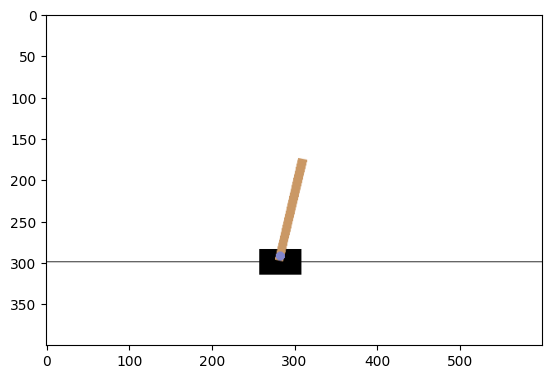

In [1]:
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt
from algorithms.REINFORCE import Reinforce
%matplotlib inline

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = True
EPISODES = 100
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

model = Reinforce(env, episodes=EPISODES, flags=[1])
rs, ars = model.learn(verbose=True)

done = truncated = False
obs, info = env.reset()
while not (done or truncated):
    action = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()
env.close()

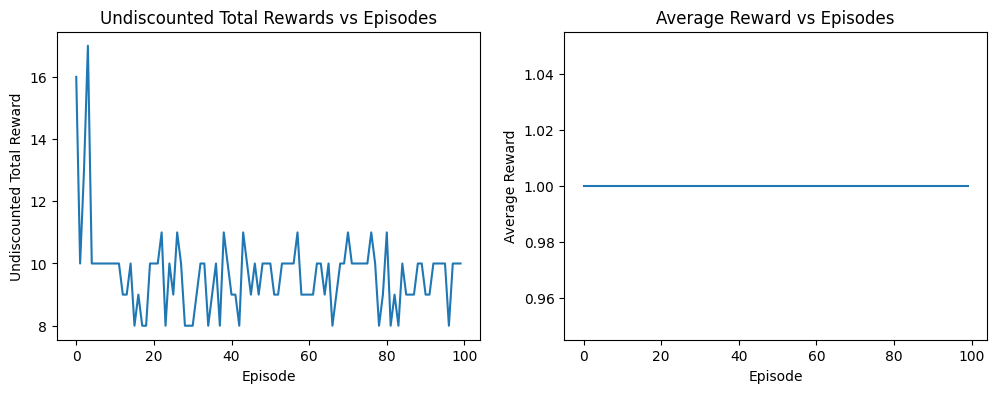

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(rs)
axes[0].set_title("Undiscounted Total Rewards vs Episodes")
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Undiscounted Total Reward")

axes[1].plot(ars)
axes[1].set_title("Average Reward vs Episodes")
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Average Reward")

plt.show()